<a href="https://colab.research.google.com/github/Eunchae-L/Eunchae-L/blob/main/Multi_Regression_%2B_Log_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mol
import seaborn as sns

데이터 불러오기

In [34]:
blue = pd.read_csv('/content/청와대_final(2).csv')
blue.head(3)

,title,count,categ,start,sadness,anger,topic__0,topic__1,topic__2,topic__3,...,topic__20,topic__21,topic__22,topic__23,topic__24,topic__25,topic__26,topic__27,topic__28,topic__29
0,서울지방병무청 탈의실에 설치된 CCTV에 대한 진상규명을 요구한다. 또한 인권위의 ...,267,인권/성평등,2020-01-02 00:00:00,-0.019507,0.021842,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,주식시장 활성화 및 소액(개미)투자자 보호,271,경제민주화,2020-01-02 00:00:00,0.004787,0.022918,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,교정기관의 민낮,198,행정,2020-01-02 00:00:00,0.052524,-0.010585,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
blue_df = blue.drop(['title', 'categ', 'start'], axis = 1, inplace = False)
blue_df.head(3)

,count,sadness,anger,topic__0,topic__1,topic__2,topic__3,topic__4,topic__5,topic__6,...,topic__20,topic__21,topic__22,topic__23,topic__24,topic__25,topic__26,topic__27,topic__28,topic__29
0,267,-0.019507,0.021842,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,271,0.004787,0.022918,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,198,0.052524,-0.010585,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
print('데이터 세트의 Shape:', blue_df.shape)
print('\n전체 feature 들의 type \n', blue_df.dtypes.value_counts())
isnull_series = blue_df.isnull().sum()
print('\nNull 컬럼과 그 건수: \n', isnull_series[isnull_series > 0].sort_values(ascending = False))

데이터 세트의 Shape: (15306, 33)

전체 feature 들의 type 
 int64      31
float64     2
dtype: int64

Null 컬럼과 그 건수: 
 Series([], dtype: int64)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


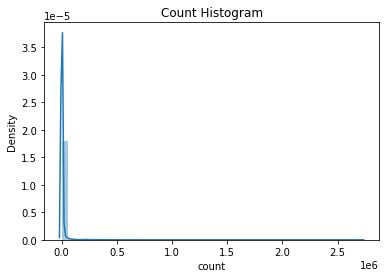

In [37]:
plt.title('Count Histogram')
sns.distplot(blue_df['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


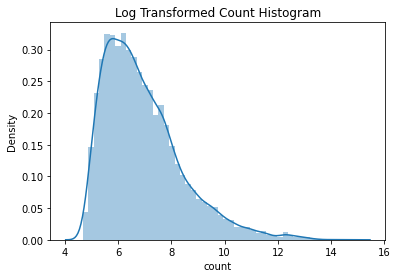

In [38]:
plt.title('Log Transformed Count Histogram')
log_count = np.log1p(blue_df['count'])
sns.distplot(log_count)

In [39]:
y = log_count
X = blue_df.drop(['count'], axis = 1, inplace = False)

model1 = sm.OLS(y, X)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     77.72
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        03:53:22   Log-Likelihood:                -26533.
No. Observations:               15306   AIC:                         5.313e+04
Df Residuals:                   15274   BIC:                         5.337e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sadness       -1.2426      0.251     -4.946      0.0

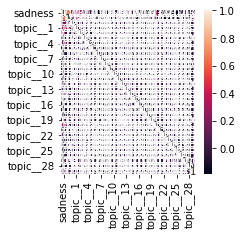

In [40]:
corr = X.corr()
plt.figure(figsize = (3,3))
sns.heatmap(corr, annot = True, fmt='.1g')

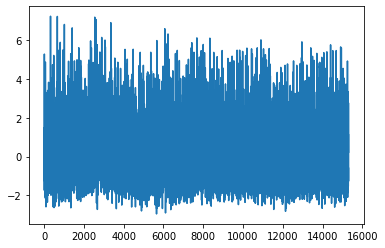

In [41]:
fitted_multi_model.resid.plot()